<a href="https://colab.research.google.com/github/DiptiMishra11/Ethanol-ANN-model/blob/main/OJT_ANN_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Biothanol_Dataset_csv.csv to Biothanol_Dataset_csv (6).csv
     IW     SG    YV   PFM    FM  SGFMW  TSSFMWBC  TSSCWAD  TRSMRP  TRSTCSD  \
0  4.70  1.020  2.71  1.91  4.70  1.028     17200     9500    57.3    57.30   
1  4.84  1.027  2.81  1.90  4.84  1.027     17000     9400    58.0    58.14   
2  4.96  1.027  2.55  1.85  4.96  1.027     16200     9000    58.2    58.20   
3  4.80  1.024  2.91  1.83  4.80  1.024     16000     8900    58.3    58.90   
4  4.76  1.026  2.70  1.88  4.76  1.026     17000     9500    58.5    58.90   

   WFMpH  WFH    BEC  
0   6.08  132  11.73  
1   6.06  320  11.73  
2   6.06  136  11.72  
3   6.09  132  11.75  
4   6.18  144  11.73  

Column Names: ['IW', 'SG', 'YV', 'PFM', 'FM', 'SGFMW', 'TSSFMWBC', 'TSSCWAD', 'TRSMRP', 'TRSTCSD', 'WFMpH', 'WFH', 'BEC']

13x13 Pearson Correlation Matrix:
                IW        SG        YV       PFM        FM     SGFMW  \
IW        1.000000  0.044666 -0.045725  0.027079 -0.100725  0.119462   
SG        0.044666 

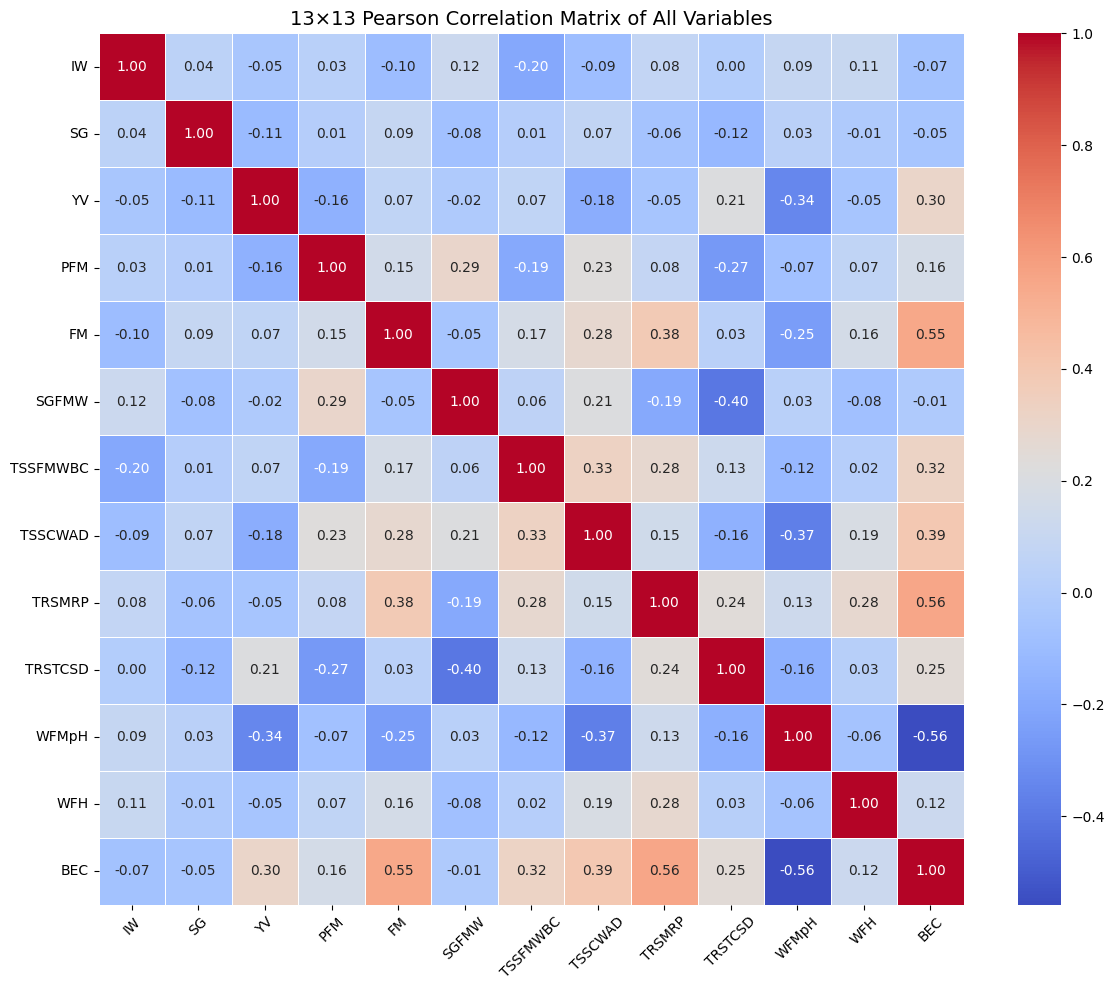

In [ ]:
# Step 1: Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Upload and load dataset
from google.colab import files
uploaded = files.upload()  # Upload your CSV file

# Replace this with the name of your uploaded file
df = pd.read_csv("Biothanol_Dataset_csv.csv")

# Step 3: Display the first few rows and column names (for reference)
print(df.head())
print("\nColumn Names:", df.columns.tolist())

# Step 4: Calculate 13x13 Pearson Correlation Matrix
corr_matrix = df.corr(method='pearson')

# Step 5: Display the correlation matrix
print("\n13x13 Pearson Correlation Matrix:")
print(corr_matrix)

# Step 6: Visualize with a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("13×13 Pearson Correlation Matrix of All Variables", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from google.colab import files

# Upload your dataset
uploaded = files.upload()
df = pd.read_csv("Biothanol_Dataset_csv.csv")

# Select the 6 columns to normalize
cols_to_normalize = ['YV', 'FM', 'TSSFMWD', 'TSCWAD', 'TRSMRP', 'WFMpH']
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df[cols_to_normalize])
normalized_df = pd.DataFrame(normalized_data, columns=cols_to_normalize)

# Option 1: Show all 1300 rows in Colab
pd.set_option('display.max_rows', 1300)
print(normalized_df)

# Option 2: Save to file
normalized_df.to_csv("normalized_6_variables.csv", index=False)
files.download("normalized_6_variables.csv")


Saving Biothanol_Dataset_csv.csv to Biothanol_Dataset_csv (4).csv
          YV        FM   TSSFMWD    TSCWAD    TRSMRP     WFMpH
0   0.444444  0.277778  0.666667  0.916667  0.498599  0.015873
1   0.722222  0.666667  0.555556  0.833333  0.694678  0.000000
2   0.000000  1.000000  0.111111  0.500000  0.750700  0.000000
3   1.000000  0.555556  0.000000  0.416667  0.778711  0.023810
4   0.416667  0.444444  0.555556  0.916667  0.834734  0.095238
5   0.361111  0.666667  0.555556  0.500000  0.778711  0.793651
6   0.222222  0.555556  0.666667  0.500000  0.700280  0.134921
7   0.166667  0.638889  0.222222  0.500000  0.924370  0.722222
8   0.361111  0.583333  0.444444  0.583333  1.000000  0.761905
9   0.861111  0.722222  0.555556  0.416667  1.000000  0.928571
10  0.166667  0.388889  0.555556  0.583333  0.773109  0.920635
11  0.222222  0.361111  0.444444  0.416667  0.708683  0.873016
12  0.444444  0.638889  0.555556  0.583333  0.439776  0.968254
13  0.500000  0.555556  0.555556  1.000000  0.633053

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from google.colab import files

# Step 1: Upload and read the dataset
uploaded = files.upload()
df = pd.read_csv("Biothanol_Dataset_csv.csv")

# Step 2: Select input features and target variable
input_features = ['YV', 'FM', 'TSSFMWD', 'TSCWAD', 'TRSMRP', 'WFMpH']
target_variable = 'BEC'

# Step 3: Normalize the input features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df[input_features])

# Step 4: Extract target (output) variable
y = df[target_variable].values

# Step 5: Perform train-test split (80% train, 20% test), fixed random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=103
)

# Step 6: Confirm the shape of the splits
print("Training input shape:", X_train.shape)
print("Training output shape:", y_train.shape)
print("Testing input shape:", X_test.shape)
print("Testing output shape:", y_test.shape)


Saving normalized_6_variables.csv to normalized_6_variables (1).csv
Training input shape: (80, 6)
Training output shape: (80,)
Testing input shape: (20, 6)
Testing output shape: (20,)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 124.3924 - val_loss: 123.0749
Epoch 2/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 124.4719 - val_loss: 121.5574
Epoch 3/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 122.5580 - val_loss: 119.6721
Epoch 4/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 119.9436 - val_loss: 117.6042
Epoch 5/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 118.3791 - val_loss: 115.2303
Epoch 6/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 113.8537 - val_loss: 112.6468
Epoch 7/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 113.6283 - val_loss: 109.8872
Epoch 8/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 110.5322 - val_loss: 106.9096
Epoch 9/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 106.5188 - val_loss: 103.7512
Epoch 10/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 105.2122 - val_loss: 100.1380
Epoch 11/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 99.8311 - val_loss: 96.0302
Epoch 12/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 

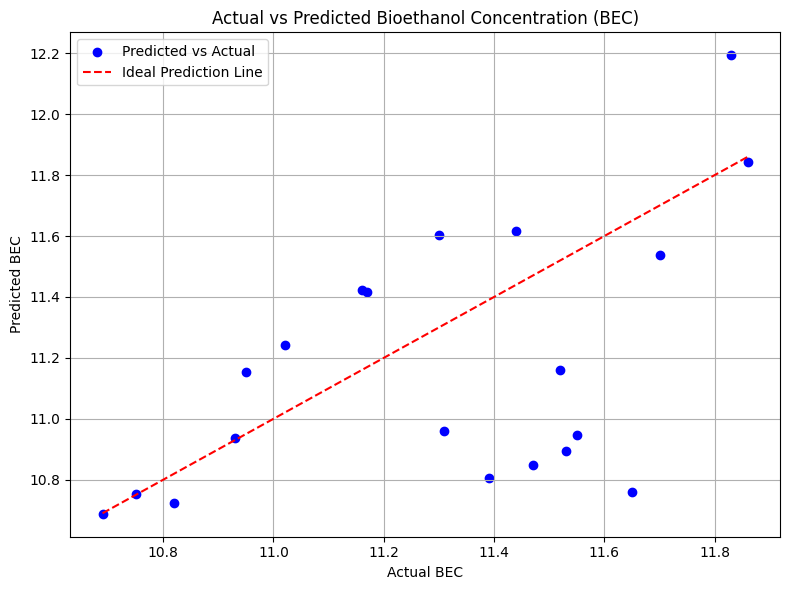

In [ ]:
# Step 1: Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Step 2: Define the ANN model
model = Sequential()
model.add(Dense(6, input_dim=6, activation='relu'))   # Input layer with 6 neurons
model.add(Dense(8, activation='relu'))                # Hidden layer
model.add(Dense(1, activation='linear'))              # Output layer

# Step 3: Compile the model
model.compile(optimizer='adam', loss='mse')

# Step 4: Train the model
history = model.fit(X_train, y_train, epochs=300, batch_size=8, verbose=1, validation_split=0.1)

# Step 5: Predict on the test set
y_pred = model.predict(X_test).flatten()

# Step 6: Evaluate performance
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"\n✅ R² score: {r2:.4f}")
print(f"✅ Mean Squared Error: {mse:.4f}")

# Step 7: Plot actual vs predicted BEC
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label='Ideal Prediction Line')
plt.xlabel("Actual BEC")
plt.ylabel("Predicted BEC")
plt.title("Actual vs Predicted Bioethanol Concentration (BEC)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 2.1772 - val_loss: 1.5829
Epoch 2/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.9841 - val_loss: 1.2457
Epoch 3/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.5812 - val_loss: 0.9671
Epoch 4/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.2618 - val_loss: 0.7360
Epoch 5/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.9314 - val_loss: 0.5493
Epoch 6/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.7078 - val_loss: 0.4053
Epoch 7/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5470 - val_loss: 0.2949
Epoch 8/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.4348 - val_loss: 0.2142
Epoch 9/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3439 - val_loss: 0.1622
Epoch 10/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2672 - val_loss: 0.1332
Epoch 11/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2450 - val_loss: 0.1203
Epoch 12/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1915 - val_loss: 0

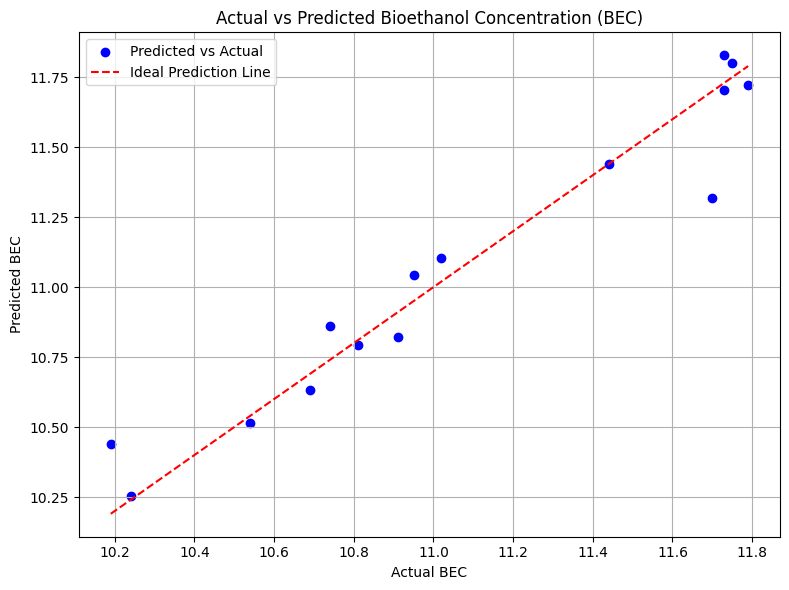

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# === Step 1: Load data ===
df = pd.read_csv('/normalized_6_variables.csv')  # Adjust path if needed
X = df.drop(columns=['BEC']).values
y = df[['BEC']].values

# === Step 2: Normalize ===
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# === Step 3: Split dataset ===
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# === Step 4: Build model ===
model = Sequential()
model.add(Dense(8, input_dim=X.shape[1], activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='linear'))

# === Step 5: Compile and Train ===
model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train, y_train, epochs=300, batch_size=8, validation_data=(X_val, y_val), verbose=1)

# === Step 6: Predict and Inverse Transform ===
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_true = scaler_y.inverse_transform(y_test)

# === Step 7: Evaluate ===
r2 = r2_score(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)

print(f"\n✅ R² score: {r2:.4f}")
print(f"✅ Mean Squared Error: {mse:.4f}")

# === Step 8: Plot actual vs predicted ===
plt.figure(figsize=(8, 6))
plt.scatter(y_true, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r--', label='Ideal Prediction Line')
plt.xlabel("Actual BEC")
plt.ylabel("Predicted BEC")
plt.title("Actual vs Predicted Bioethanol Concentration (BEC)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
model.save("bec_ann_model.h5")


In [ ]:
model.save('my_model.keras')

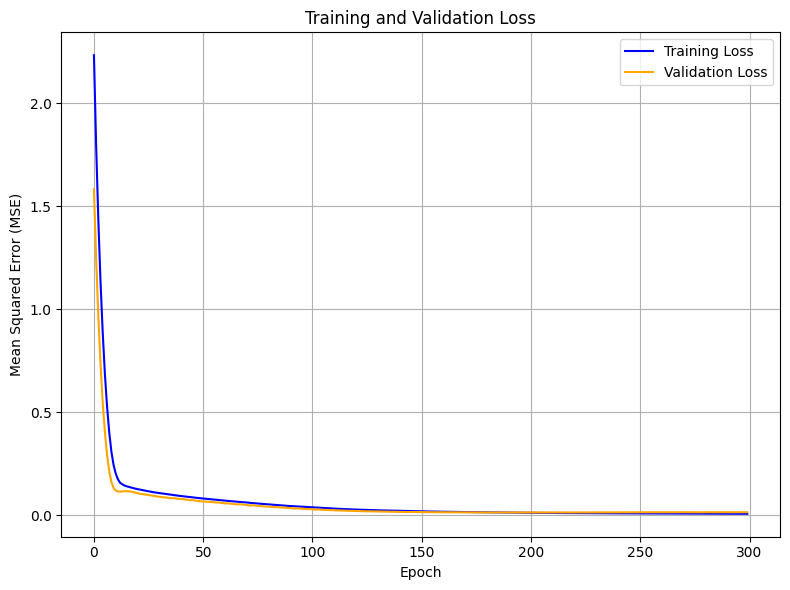

In [ ]:
# Plot training & validation loss values
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from tensorflow.keras.models import load_model
model = load_model("my_model.keras")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 1.1000 - val_loss: 0.7711
Epoch 2/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6581 - val_loss: 0.4266
Epoch 3/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3585 - val_loss: 0.2513
Epoch 4/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2889 - val_loss: 0.1826
Epoch 5/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2209 - val_loss: 0.1592
Epoch 6/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2076 - val_loss: 0.1468
Epoch 7/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1801 - val_loss: 0.1386
Epoch 8/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1619 - val_loss: 0.1311
Epoch 9/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1548 - val_loss: 0.1225
Epoch 10/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1523 - val_loss: 0.1143
Epoch 11/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1526 - val_loss: 0.1060
Epoch 12/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.

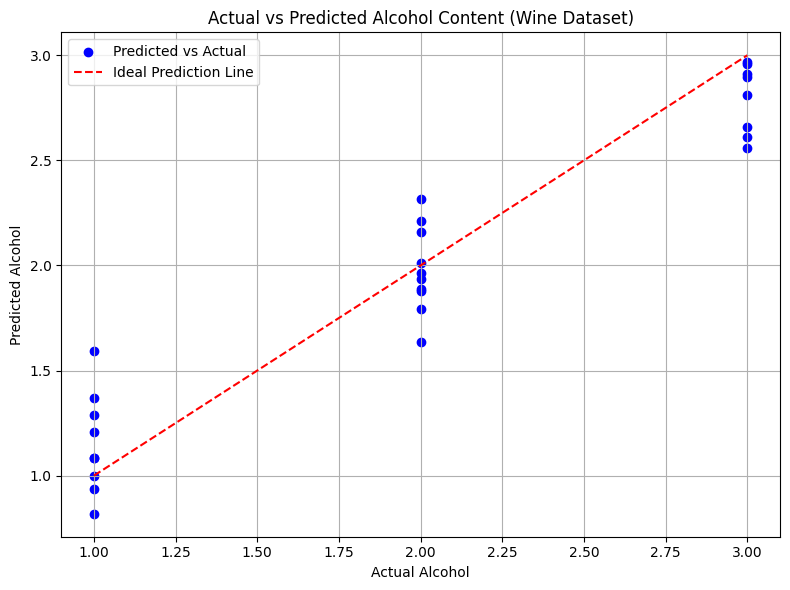

In [ ]:
# 1. Import Libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# 2. Load Dataset
df = pd.read_csv("/content/Wine_Dataset.csv")

# 3. Separate Inputs and Output
X = df.drop(columns=['Alcohol'])
y = df[['Alcohol']]

# 4. Normalize both Inputs and Output
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# 5. Split into train-validation-test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# 6. Build ANN Model
model = Sequential()
model.add(Dense(8, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='linear'))

# 7. Compile & Train
model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train, y_train, epochs=300, batch_size=8, validation_data=(X_val, y_val), verbose=1)

# 8. Predict & Evaluate
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_true = scaler_y.inverse_transform(y_test)

r2 = r2_score(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)

print(f"\n✅ ANN Evaluation on Wine Dataset:")
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

# 9. Plot Actual vs Predicted Alcohol
plt.figure(figsize=(8, 6))
plt.scatter(y_true, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r--', label='Ideal Prediction Line')
plt.xlabel("Actual Alcohol")
plt.ylabel("Predicted Alcohol")
plt.title("Actual vs Predicted Alcohol Content (Wine Dataset)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Calculate performance metrics
r2 = r2_score(df_model['Ethanol_Yield_%'], df_model['Predicted_Ethanol_Yield_%'])
mse = mean_squared_error(df_model['Ethanol_Yield_%'], df_model['Predicted_Ethanol_Yield_%'])
mae = mean_absolute_error(df_model['Ethanol_Yield_%'], df_model['Predicted_Ethanol_Yield_%'])

print(f"🔹 R² Score: {r2:.4f}")
print(f"🔹 Mean Squared Error (MSE): {mse:.4f}")
print(f"🔹 Mean Absolute Error (MAE): {mae:.4f}")


🔹 R² Score: 0.9672
🔹 Mean Squared Error (MSE): 27.6708
🔹 Mean Absolute Error (MAE): 3.3156


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
🔹 R² Score: 0.9746
🔹 Mean Squared Error (MSE): 21.4768
🔹 Mean Absolute Error (MAE): 3.5729


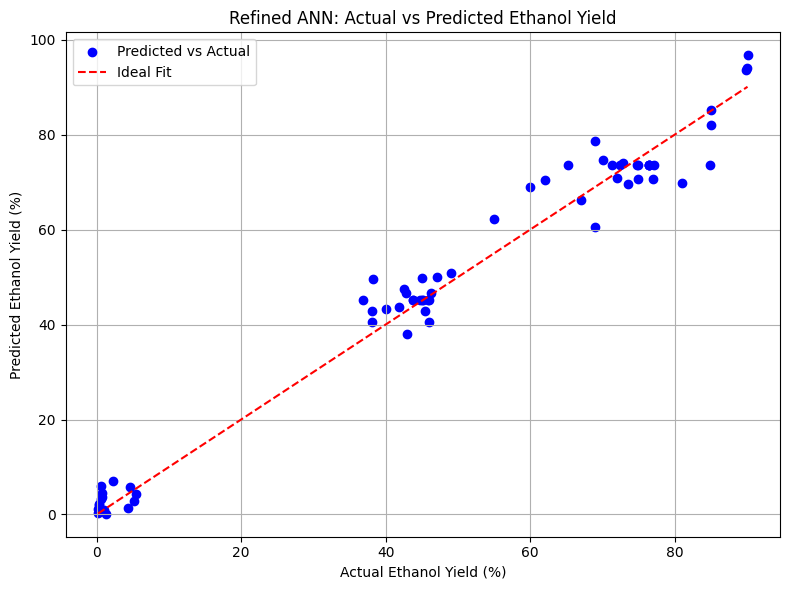

In [ ]:
##TESTING OF EXTRACTED DATASET


# STEP 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# STEP 2: Load Data
df_new = pd.read_csv("/content/extracted data csv.csv")
df_new.columns = df_new.columns.str.strip()

# STEP 3: Clean pH column
df_new['pH'] = df_new['pH'].astype(str).str.extract(r'(\d+\.?\d*)')
df_new['pH'] = pd.to_numeric(df_new['pH'], errors='coerce')

# STEP 4: Drop unusable or incomplete columns
df_model = df_new.drop(columns=['Solid_Loading_%', 'Ethanol_Conc_g_L'])
df_model = df_model.dropna(subset=['Ethanol_Yield_%', 'pH', 'Temperature_C'])

# STEP 5: Label encode categorical columns
label_encoders = {}
for col in ['Inoculum', 'Substrate', 'Fermentation_Type']:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col].astype(str))
    label_encoders[col] = le

# STEP 6: Prepare input (X) and output (y)
X = df_model.drop(columns=['Ethanol_Yield_%'])
y = df_model[['Ethanol_Yield_%']]

# STEP 7: Normalize input and output
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Save normalized input + output to CSV
normalized_df = pd.DataFrame(X_scaled, columns=X.columns)
normalized_df['Ethanol_Yield_%'] = y.reset_index(drop=True)
normalized_df.to_csv("Normalized_dataset.csv", index=False)


# STEP 8: Build and train ANN
model = Sequential([
    Dense(8, input_dim=X_scaled.shape[1], activation='relu'),
    Dense(10, activation='relu'),
    Dense(1, activation='linear')
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_scaled, y_scaled, epochs=300, batch_size=4, verbose=0)

# STEP 9: Predict and inverse transform output
y_pred_scaled = model.predict(X_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

# STEP 10: Performance Evaluation
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)

print(f"🔹 R² Score: {r2:.4f}")
print(f"🔹 Mean Squared Error (MSE): {mse:.4f}")
print(f"🔹 Mean Absolute Error (MAE): {mae:.4f}")

# STEP 11: Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Ideal Fit')
plt.xlabel("Actual Ethanol Yield (%)")
plt.ylabel("Predicted Ethanol Yield (%)")
plt.title("Refined ANN: Actual vs Predicted Ethanol Yield")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step

 Performance on Test Set (20%):
🔹 R² Score: 0.9275
🔹 Mean Squared Error (MSE): 48.9494
🔹 Mean Absolute Error (MAE): 4.8879


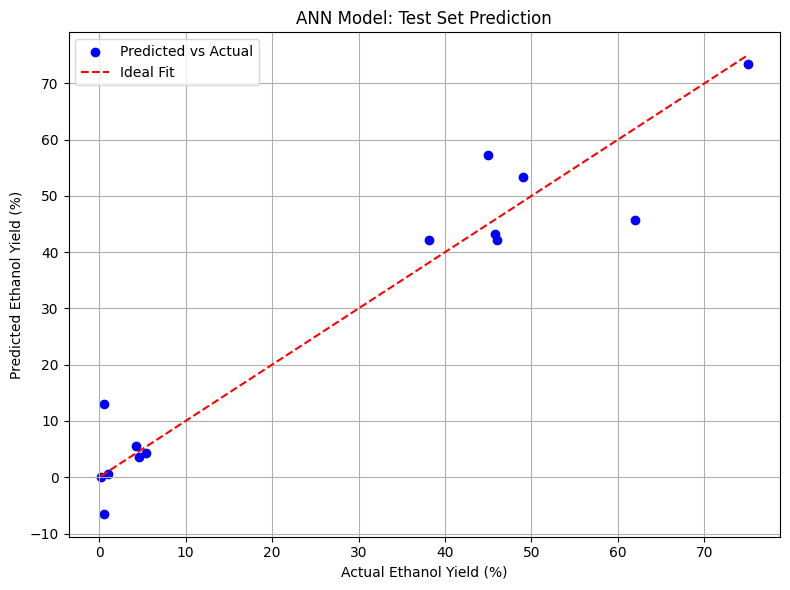

In [ ]:
##TESTING OF EXTRACTED DATASET BY TRAIN-TEST SPLIT(80/20)


# STEP 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


# STEP 2: Load Data
df_new = pd.read_csv("/content/extracted data csv.csv")
df_new.columns = df_new.columns.str.strip()

# STEP 3: Drop unusable or incomplete columns
df_model = df_new.drop(columns=['Solid_Loading_%', 'Ethanol_Conc_g_L'])
df_model = df_model.dropna(subset=['Ethanol_Yield_%', 'pH', 'Temperature_C'])

# STEP 4: Label encode categorical columns
label_encoders = {}
for col in ['Inoculum', 'Substrate', 'Fermentation_Type']:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col].astype(str))
    label_encoders[col] = le

# STEP 5: Prepare input (X) and output (y)
X = df_model.drop(columns=['Ethanol_Yield_%'])
y = df_model[['Ethanol_Yield_%']]

# STEP 6: Normalize input and output
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Save normalized input + output to CSV
normalized_df = pd.DataFrame(X_scaled, columns=X.columns)
normalized_df['Ethanol_Yield_%'] = y.reset_index(drop=True)
normalized_df.to_csv("Normalized_dataset.csv", index=False)

# STEP 7: Train-test split (after normalization)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# STEP 8: Build and train ANN on training set
model = Sequential([
    Dense(8, input_dim=X_train.shape[1], activation='relu'),
    Dense(10, activation='relu'),
    Dense(1, activation='linear')
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=300, batch_size=4, verbose=0)

# STEP 9: Predict on test set
y_test_pred_scaled = model.predict(X_test)
y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled)
y_test_true = scaler_y.inverse_transform(y_test)

# STEP 10: Performance metrics
r2 = r2_score(y_test_true, y_test_pred)
mse = mean_squared_error(y_test_true, y_test_pred)
mae = mean_absolute_error(y_test_true, y_test_pred)

print(f"\n Performance on Test Set (20%):")
print(f"🔹 R² Score: {r2:.4f}")
print(f"🔹 Mean Squared Error (MSE): {mse:.4f}")
print(f"🔹 Mean Absolute Error (MAE): {mae:.4f}")

# STEP 5: Plot Actual vs Predicted on Test Set
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test_true, y_test_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test_true.min(), y_test_true.max()], [y_test_true.min(), y_test_true.max()], 'r--', label='Ideal Fit')
plt.xlabel("Actual Ethanol Yield (%)")
plt.ylabel("Predicted Ethanol Yield (%)")
plt.title("ANN Model: Test Set Prediction")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
